### Lab 4 - Parametric & Non Parametric - Models

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic regression is used to perform classification tasks upon the student dataset.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score

In [3]:
df = pd.read_csv("student-mat.csv")

In [5]:
df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [20]:
X = df.drop(['G1', 'G2', 'school','sex','address','famsize','Pstatus','Medu','Mjob','Fedu','Fjob','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','reason','guardian'], axis=1)

y = df['G3']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 80)

In [26]:
from sklearn.linear_model import LogisticRegression

# A logistic regressor is used to predict the marks of the student in the third subject.
# It is also used for comparison with other methods.
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [44]:
y_pred = lr.predict(X_test)

In [33]:
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

0.569620253164557

In [32]:
accuracy_percentage = 100*accuracy
accuracy_percentage

56.9620253164557

In [37]:
models_df =  pd.DataFrame(columns=['mae', 'rmse', 'accuracy'])

In [41]:
def make_report(models_df, model, X_test, y_test, name):
    report = pd.DataFrame(columns={'mae'}, data=[0])
    
    report['mae'] = mean_absolute_error(y_test, model.predict(X_test).round())
    report['rmse'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test).round()))
    report['accuracy'] = accuracy_score(y_test, model.predict(X_test).round())
    
    report.index = [name]
    models_df = models_df.append(report)
    return models_df

In [42]:
models_df = make_report(models_df, lr, X_test, y_test, 'Logistic_regression')

In [43]:
models_df

,mae,rmse,accuracy
Logistic_regression,0.481013,0.763072,0.56962


# KNN Model 
k-Nearest-Neighbors (k-NN) is a supervised machine learning model. Supervised learning is when a model learns from data that is already labeled. A supervised learning model takes in a set of input objects and output values.

## Case 1

In [87]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 
# Loading data
irisData = load_iris()
 
# Create feature and target arrays
X = irisData.data
y = irisData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [96]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 
# Loading data
irisData = load_iris()
 
# Create feature and target arrays
X = irisData.data
y = irisData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.9666666666666667


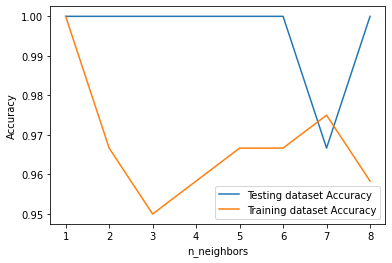

In [89]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


## Case 2

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [5]:
#To see what the dataset actually looks like, execute the following command:

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Preprocessing
#The next step is to split our dataset into its attributes and labels. To do so, use the following code:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.9666666666666667


In [13]:
y_pred = knn.predict(X_test)

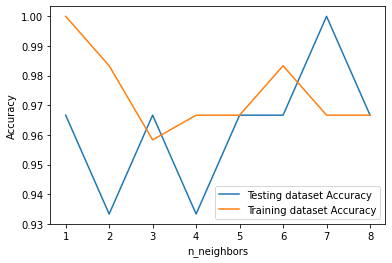

In [15]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()